# EDA Car Data Set

We will explore the Car Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:

- Removing duplicates 
- Missing value treatment  
- Outlier Treatment
- Normalizing and Scaling( Numerical Variables)
- Encoding Categorical variables( Dummy Variables)
- Bivariate Analysis

As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set

We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.

In [2]:
df=pd.read_excel('C:\\Users\\jayveer\\Downloads\\EDA Cars.xlsx')

# Basic Data Exploration 

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- head of the dataset
- shape of the dataset
- info of the dataset
- summary of the dataset

In [3]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTEL CODE
0,1,125301,z_No,z_F,Bachelors,z_Blue Collar,45.703,Commercial,17430,Sports Car,7.0,Texas,42420.0
1,2,50815.4,z_No,M,z_High School,22,20.5916,Private,18930,Minivan,1.0,Texas,42420.0
2,3,62977.8,NaN,z_F,Bachelors,Clerical,33.6399,Private,Na,z_SUV,1.0,Texas,42420.0
3,4,77100,z_No,z_F,NaN,Lawyer,15.4157,NaN,18300,Sports Car,11.0,Texas,42420.0
4,5,130795,z_No,M,<High School,NaN,*****,Commercial,28340,Panel Truck,10.0,Texas,42420.0


head  function will tell you the top records in the data set. By default python shows you only top 5 records.

In [4]:
df.shape

(303, 13)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
INDEX             303 non-null int64
INCOME            262 non-null object
MARITAL STATUS    290 non-null object
SEX               297 non-null object
EDUCATION         273 non-null object
JOB               267 non-null object
TRAVEL TIME       265 non-null object
USE               250 non-null object
MILES CLOCKED     292 non-null object
CAR TYPE          293 non-null object
CAR AGE           283 non-null float64
CITY              298 non-null object
POSTEL CODE       300 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 30.9+ KB


info() is used to check the Information about the data and the datatypes of each respective attributes.

Looking at the data in the head function and in info, we know that the variable Income and travel time are of float data type instead of object. So we will convert it into float. 

In [6]:
df['INCOME'] = df['INCOME'].replace(to_replace = '@@', value =np.nan)
df['INCOME'] = df['INCOME'].astype(float)


In [7]:
df['TRAVEL TIME'] = df['TRAVEL TIME'].replace(to_replace = '*****', value =np.nan)

In [8]:
df['TRAVEL TIME'] = df['TRAVEL TIME'].astype(float)

In [9]:
df['MILES CLOCKED'] = df['MILES CLOCKED'].replace(to_replace = 'Na', value =np.nan)
df['MILES CLOCKED'] = df['MILES CLOCKED'].replace(to_replace = '*****', value =np.nan)
df['MILES CLOCKED'] = df['MILES CLOCKED'].astype(float)

In [10]:
df.replace(to_replace = '*****', value =np.nan,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
INDEX             303 non-null int64
INCOME            260 non-null float64
MARITAL STATUS    275 non-null object
SEX               297 non-null object
EDUCATION         259 non-null object
JOB               267 non-null object
TRAVEL TIME       262 non-null float64
USE               250 non-null object
MILES CLOCKED     278 non-null float64
CAR TYPE          293 non-null object
CAR AGE           283 non-null float64
CITY              298 non-null object
POSTEL CODE       300 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [12]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTEL CODE
count,303.000000,260.000000,262.000000,278.000000,283.000000,300.000000
mean,139.640264,50025.162170,34.282098,13591.978417,6.265018,50712.196667
std,85.178422,41186.807914,14.910178,7167.328655,5.111218,24141.029290
min,1.000000,0.000000,5.000000,1500.000000,1.000000,11435.000000
25%,62.500000,20452.885022,24.449874,7900.000000,1.000000,42420.000000
50%,138.000000,44571.590870,33.564757,12065.000000,6.000000,47150.000000
75%,213.500000,66485.761387,43.907339,18240.000000,10.000000,61701.000000
max,289.000000,204667.589700,83.617643,38000.000000,20.000000,90049.000000


The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# Check for Duplicate records

In [13]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 14


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTEL CODE
69,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,<High School,z_Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.

In [14]:
df.drop_duplicates(inplace=True) 

Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.

In [15]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTEL CODE


Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289

In [16]:
df.shape

(289, 13)

# Check for missing value

In [17]:
# Check for missing value in any column
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               36
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               5
POSTEL CODE        3
dtype: int64

We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

- Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.

- Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.

- Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.

- Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.

In this exercise, we will replace the numerical columns with meadian values and for categorical columns we will drop the missing values.

In [18]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()
median5=df["POSTEL CODE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)
df["POSTEL CODE"].replace(np.nan,median5,inplace=True)

In [19]:
df.dropna(inplace=True)

As a cross check, post dropping the missing values we will see whether those has been removed from the actual data set.

In [20]:
# Check for missing value in any column
df.isnull().sum()

INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTEL CODE       0
dtype: int64

# Outlier Treatment

To check for outliers, we will be plotting the box plots.

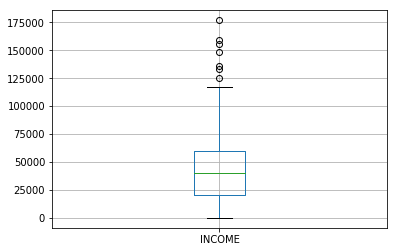

In [21]:
df.boxplot(column=['INCOME'])

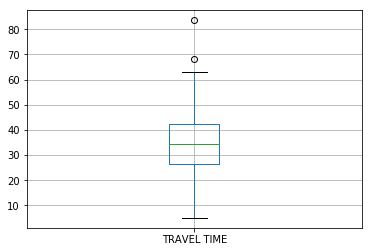

In [22]:
df.boxplot(column=['TRAVEL TIME'])

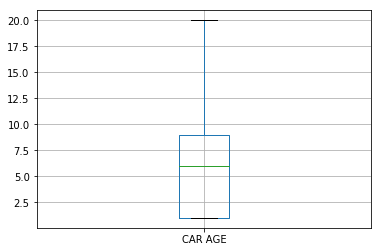

In [23]:
df.boxplot(column=['CAR AGE'])

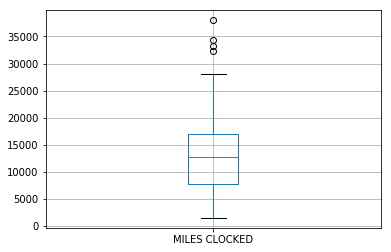

In [24]:
df.boxplot(column=['MILES CLOCKED'])

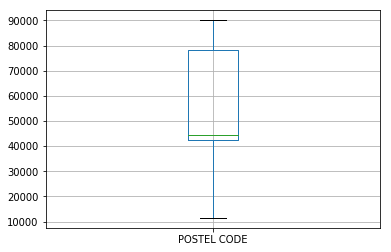

In [25]:
df.boxplot(column=['POSTEL CODE'])

Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.

These outliers value needs to be teated and there are several ways of treating them:
    
- Drop the outlier value
- Replace the outlier value using the IQR 



Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
    

In [27]:
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])

lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])


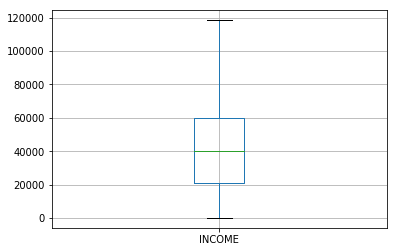

In [28]:
df.boxplot(column=['INCOME'])

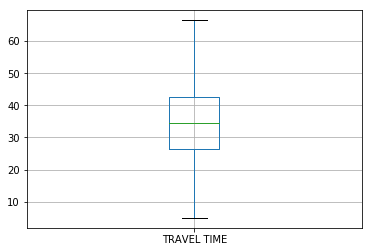

In [29]:
df.boxplot(column=['TRAVEL TIME'])

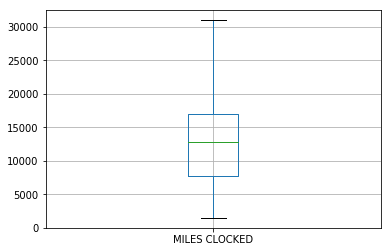

In [30]:
df.boxplot(column=['MILES CLOCKED'])

If you look at the box plots above,post treating the outlier there are no outliers in all these columns. 

# Bivariate Analysis

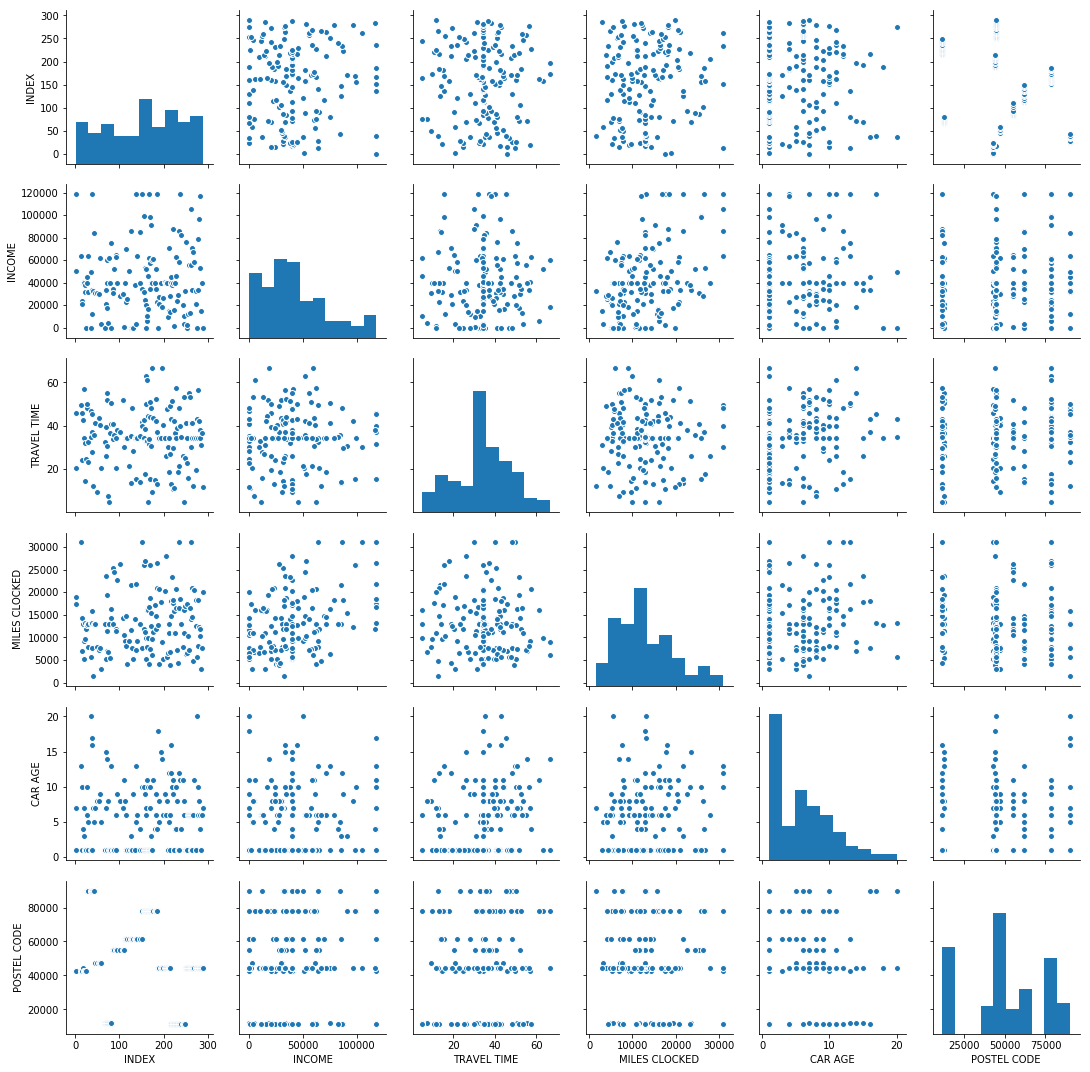

In [31]:
sns.pairplot(df)


In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

In [32]:
df.corr()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTEL CODE
INDEX,1.000000,0.041868,-0.019518,0.075957,0.019703,-0.271519
INCOME,0.041868,1.000000,0.017100,0.401158,0.095810,0.116914
TRAVEL TIME,-0.019518,0.017100,1.000000,-0.038888,0.219055,0.075314
MILES CLOCKED,0.075957,0.401158,-0.038888,1.000000,0.124549,-0.059162
CAR AGE,0.019703,0.095810,0.219055,0.124549,1.000000,-0.062800
POSTEL CODE,-0.271519,0.116914,0.075314,-0.059162,-0.062800,1.000000


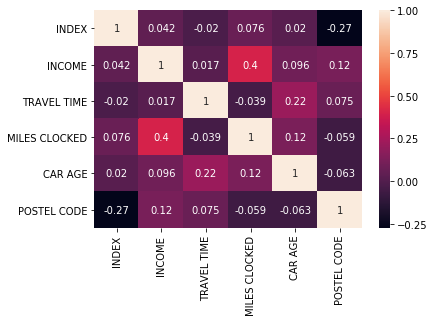

In [33]:
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

# Normalizing and Scaling

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these varaibles are of different scales, it is tough to compare these variables. 

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

In [34]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])
df['POSTEL CODE'] = std_scale.fit_transform(df[['POSTEL CODE']])
df['MILES CLOCKED']= std_scale.fit_transform(df[['MILES CLOCKED']])

In [36]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTEL CODE
0,1,2.477487,z_No,z_F,Bachelors,z_Blue Collar,0.837173,Commercial,0.638878,Sports Car,0.255288,Texas,-0.292134
1,2,0.274488,z_No,M,z_High School,22,-1.053628,Private,0.866600,Minivan,-1.031364,Texas,-0.292134
13,14,0.702183,Yes,z_F,Masters,Lawyer,1.128863,Private,2.697110,Van,1.541941,Texas,-0.292134
14,15,-0.596603,z_No,M,Bachelors,Clerical,-0.764597,Private,0.151552,Minivan,0.898614,Texas,-0.292134
15,16,-0.702019,Yes,z_F,z_High School,Home Maker,0.852587,Private,-0.962770,z_SUV,-1.031364,Texas,-0.292134


If you look at the variables INCOME, TRAVEL TIME, CAR AGE and POSTEL CODE all has been normalized and scaled in one scale now. 

# ENCODING

One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

This is required to do since the machine learning algorithms only works on the numerica data. That is why there is a need to convert the categorical column into numerical one.

get_dummies is the method which creates dummy variable for each categorical variable.

In [37]:
dummies=pd.get_dummies(df[["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]], columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"], prefix=["married", "sex","Education","Job","Use","cartype","city"]).head()

In [38]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]
df = pd.concat([df, dummies], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace=True)

In [39]:
df.head()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTEL CODE,married_No,married_Yes,married_z_No,sex_M,...,city_Columbia,city_Houston,city_Las Vegas,city_Los Angeles,city_New Albany,city_New York City,city_San Francisco,city_Seattle,city_Texas,city_Washington
0,1,2.477487,0.837173,0.638878,0.255288,-0.292134,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.274488,-1.053628,0.866600,-1.031364,-0.292134,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,14,0.702183,1.128863,2.697110,1.541941,-0.292134,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,15,-0.596603,-0.764597,0.151552,0.898614,-0.292134,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,16,-0.702019,0.852587,-0.962770,-1.031364,-0.292134,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In the data set above married_No, married yes and all such columns are the dummy variables which we have just created.